Loading the dataset...
Dataset loaded successfully!
Shape of the dataset: (962, 2)
Sample data from the dataset:
               Category                                             Resume
579    Python Developer  Training attended: 1. Successfully completed E...
916             Testing  â Willingness to accept the challenges. â ...
75                   HR  Education Details \r\n BA   mumbai University\...
294  Health and fitness  Education Details \r\nMay 2014 Diploma Nutriti...
457  Automation Testing  TECHNICAL SKILLS Automation Testing â¢ Seleni...
Visualizing the category distribution...


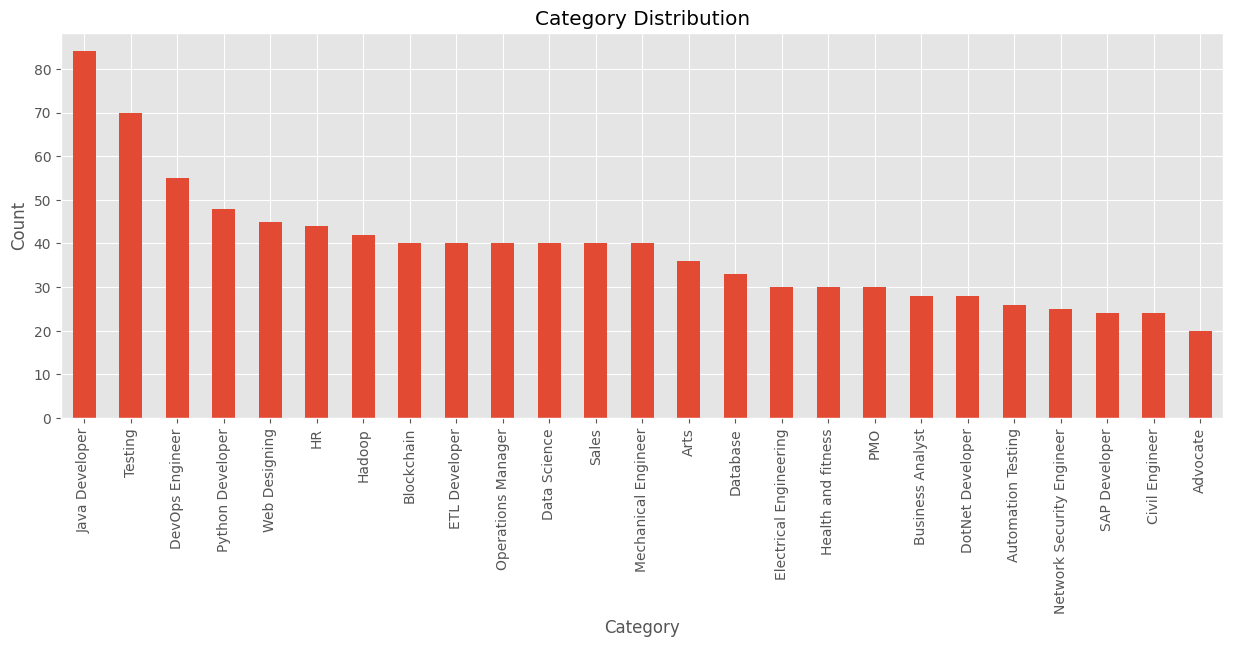

Visualizing category distribution as a pie chart...


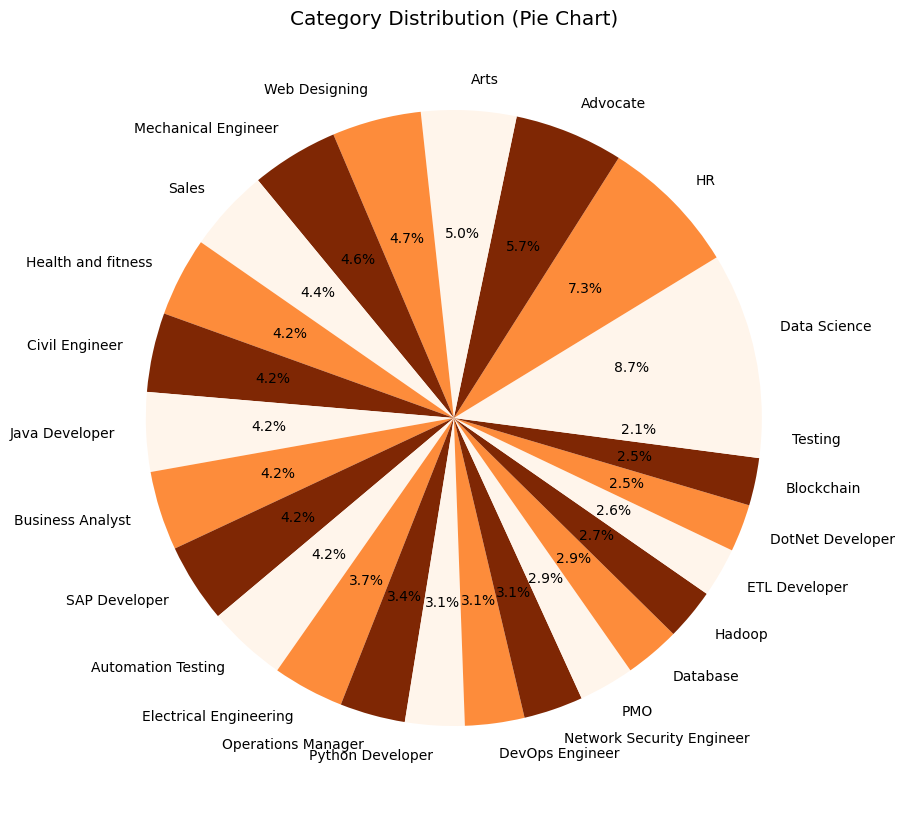

Cleaning the resume text data...
Resume text data cleaned!
Encoding the 'Category' column...
Category encoding completed. Unique categories: [ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]
Vectorizing the resume text using TF-IDF...
TF-IDF vectorization completed.
Splitting the data into training and test sets...
Data split completed. Training set size: (769, 8017) Test set size: (193, 8017)
Training KNN Classifier...
Accuracy of the KNN Classifier on test data: 0.9845
Training multiple models and comparing accuracy...
Accuracy of KNeighborsClassifier on test data: 0.9845
Accuracy of LogisticRegression on test data: 0.9948
Accuracy of RandomForestClassifier on test data: 0.9845
Accuracy of SVC on test data: 0.9948
Accuracy of MultinomialNB on test data: 0.9793
Accuracy of OneVsRestClassifier on test data: 0.9845
Training Logistic Regression model for final use...
Final Logistic Regression Model Accuracy: 0.9948
Saving the model and TF-IDF vectorizer using 

In [1]:
# Import necessary libraries for data handling, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
import pickle

# Set the style for plots to 'ggplot' for a clean aesthetic
plt.style.use('ggplot')

# Load the dataset from a CSV file
# This dataset contains resumes categorized into different job roles
print("Loading the dataset...")
df = pd.read_csv(r"C:\Users\DEEP\Downloads\Resume Categorization\Data\Resumes.csv")
print("Dataset loaded successfully!")
print("Shape of the dataset:", df.shape)  # Display the shape of the dataset (rows, columns)
print("Sample data from the dataset:")
print(df.sample(5))  # Show a random sample of 5 rows for inspection

# Visualizing the distribution of job categories with a bar plot
# This helps us understand how many resumes belong to each category
print("Visualizing the category distribution...")
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind="bar")
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Visualizing the category distribution using a pie chart
# This provides a visual representation of the proportions of resumes in each category
print("Visualizing category distribution as a pie chart...")
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.title('Category Distribution (Pie Chart)')
plt.show()

# Function to clean resume text by removing URLs, email addresses, punctuation, and stop words
# Cleaning is essential to remove noise from text data so that the model can focus on meaningful information
def clean(text):
    # Remove URLs and email addresses using regular expressions
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)
    
    # Remove punctuation and unwanted symbols, leaving only words
    clean_text = re.sub('[^\w\s]', '', clean_text)
    
    # Remove stop words (commonly used words that don't carry significant meaning like 'the', 'is')
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text

# Applying the clean function to the 'Resume' column
# Each resume will be processed and cleaned before vectorization
print("Cleaning the resume text data...")
df['Resume'] = df['Resume'].apply(lambda x: clean(x))
print("Resume text data cleaned!")

# Encoding the 'Category' column using LabelEncoder
# Machine learning models need numerical data, so we convert the text-based categories into numbers
print("Encoding the 'Category' column...")
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])  # Convert categories to numerical labels
print("Category encoding completed. Unique categories:", df['Category'].unique())

# Vectorizing the 'Resume' text using TF-IDF (Term Frequency-Inverse Document Frequency)
# TF-IDF transforms text into numerical values that represent the importance of words in a document relative to the corpus
# This is crucial for machine learning models, as they cannot process raw text directly
print("Vectorizing the resume text using TF-IDF...")
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])  # Learn the vocabulary from the resume data
resume = tfidf.transform(df['Resume'])  # Transform the resumes into a TF-IDF matrix
print("TF-IDF vectorization completed.")

# Splitting the data into training and test sets
# We need to divide the data so that we can train the model on one part and evaluate its performance on unseen data
print("Splitting the data into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(resume, df['Category'], test_size=0.2, random_state=42)
print("Data split completed. Training set size:", X_train.shape, "Test set size:", X_test.shape)

# Training and evaluating a KNN Classifier
# K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm used for classification
print("Training KNN Classifier...")
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)  # Train the model on the training data
y_pred = clf.predict(X_test)  # Predict on the test data
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy of the predictions
print(f"Accuracy of the KNN Classifier on test data: {accuracy:.4f}")

# Defining and training multiple models for comparison
# This step compares the performance of several different classifiers to find the most accurate one
print("Training multiple models and comparing accuracy...")
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier()) 
}

accuracy_scores = {}  # Dictionary to store accuracy of each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train each model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores[model_name] = accuracy  # Store accuracy in dictionary
    print(f"Accuracy of {model_name} on test data: {accuracy:.4f}")

# Training the Logistic Regression model for final use
# Logistic Regression is often used for classification and tends to perform well with text data
print("Training Logistic Regression model for final use...")
model = LogisticRegression()
model.fit(X_train, y_train)  # Train the final model
y_pred = model.predict(X_test)  # Make predictions
final_accuracy = accuracy_score(y_test, y_pred)  # Calculate final accuracy
print(f"Final Logistic Regression Model Accuracy: {final_accuracy:.4f}")

# Saving the TF-IDF vectorizer and Logistic Regression model using pickle
# Saving these objects allows us to reuse the model and vectorizer in the future without retraining
print("Saving the model and TF-IDF vectorizer using pickle...")
pickle.dump(tfidf, open(r'C:\Users\DEEP\Downloads\Resume Categorization\Weights\tfidf.pkl', 'wb'))  # Save the TF-IDF vectorizer
pickle.dump(model, open(r'C:\Users\DEEP\Downloads\Resume Categorization\Weights\model.pkl', 'wb'))  # Save the Logistic Regression model
print("Model and TF-IDF vectorizer saved successfully!")